Referencia a lo que sigue: [R for data science](https://r4ds.had.co.nz/)

# Visualización con [ggplot2](https://ggplot2.tidyverse.org/)

Un paquete de R que es versátil para la visualización bonita de datos es el de `ggplot2`. Tal paquete implementa *grammar of graphics* que es un sistema para describir y construir los componentes de una gráfica. Ver [The Grammar of Graphics](https://www.springer.com/gp/book/9780387245447) y [A Layered Grammar of Graphics](https://byrneslab.net/classes/biol607/readings/wickham_layered-grammar.pdf).

In [1]:
library(ggplot2) #cargamos el paquete con la función library

## Una opción para graficar es con la función [qplot](https://ggplot2.tidyverse.org/reference/qplot.html)

Y algunas funciones para crear datos de juguete son:

### *combine*: [c](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/c)

Con *combine* creamos un vector de sus argumentos que se almacena en x. Por ejemplo:


In [2]:
x <- c(1,2, 3) #vector con valores 1, 2, 4

In [3]:
print(x)

[1] 1 2 3


### Secuencia: [seq](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/seq)

Con `seq` creamos un vector cuyos valores forman una secuencia

In [4]:
y <- seq(1, 2, .5)

In [5]:
print(y)

[1] 1.0 1.5 2.0


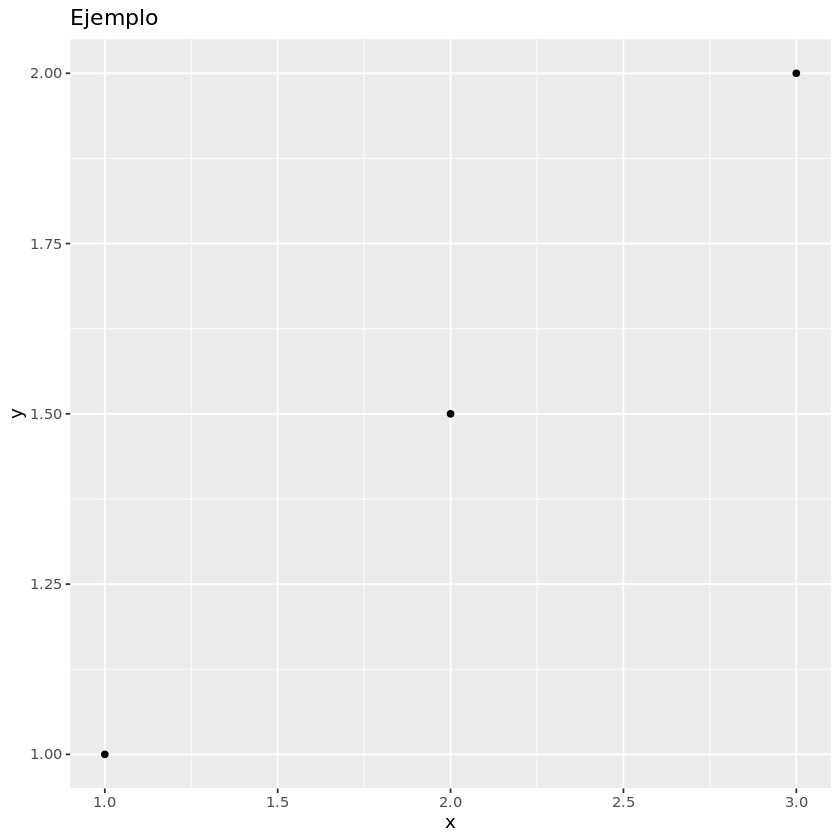

In [6]:
qplot(x = x, y = y, main = "Ejemplo") 

## Otra función para graficar más versátil es [ggplot](https://ggplot2.tidyverse.org/reference/ggplot.html)

Con la función `ggplot` creamos un sistema de coordenadas al que le podemos colocar capas o *layers*. 

In [7]:
coordinate_system <- ggplot()

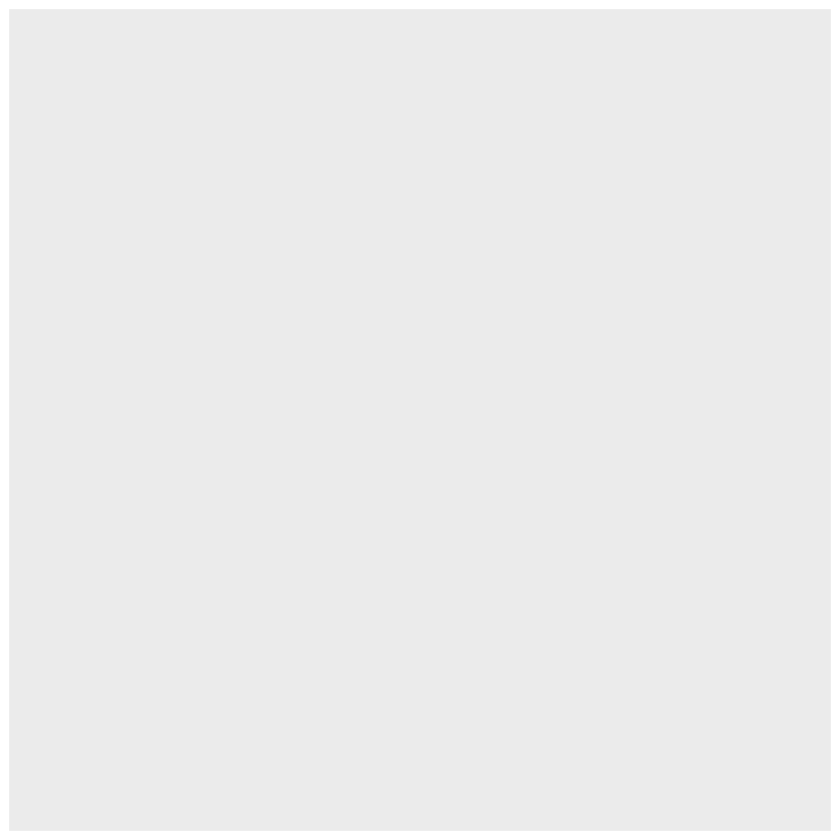

In [8]:
coordinate_system

Y para hacer una gráfica colocaremos los datos anteriores en un *data frame* el cual es una colección rectangular de variables en las columnas y observaciones en los renglones, por ejemplo:

| Variable1 | Variable 2|
|:---:|:---:|
|4| 7.5|
|-5.1|8|

En R podemos crear un *data frame* con la función [data.frame](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/data.frame)

Datos:

In [9]:
print(x)

[1] 1 2 3


In [10]:
print(y)

[1] 1.0 1.5 2.0


In [11]:
df <- data.frame(variable1 = x, variable2 = y) 

In [12]:
print(df)

  variable1 variable2
1         1       1.0
2         2       1.5
3         3       2.0


El paquete `ggplot2` tiene funciones que añaden **capas de diferentes tipo** a una gráfica. Tales funciones tienen un argumento de nombre *mapping* que define cómo se mapean las variables a **propiedades visuales** de los objetos de una gráfica. Este argumento siempre se le acompaña de la función [aes](https://ggplot2.tidyverse.org/reference/aes.html) (`aes` se refiere a *aesthetics*) que recibe argumentos para las propiedades.

Un ejemplo para añadir una **capa de puntos** a la gráfica es [geom_point](https://ggplot2.tidyverse.org/reference/geom_point.html) que crea un *scatterplot*. En la función `aes` usamos los nombres `x` y `y` que son las **localizaciones** de los puntos cuyos valores los toman de las variables `variable1` y `variable2` del *data frame* anterior y que estarán en el eje horizontal y el eje vertical respectivamente. En este caso las localizaciones de los puntos son las propiedades visuales de la gráfica, *aka aesthetics*.

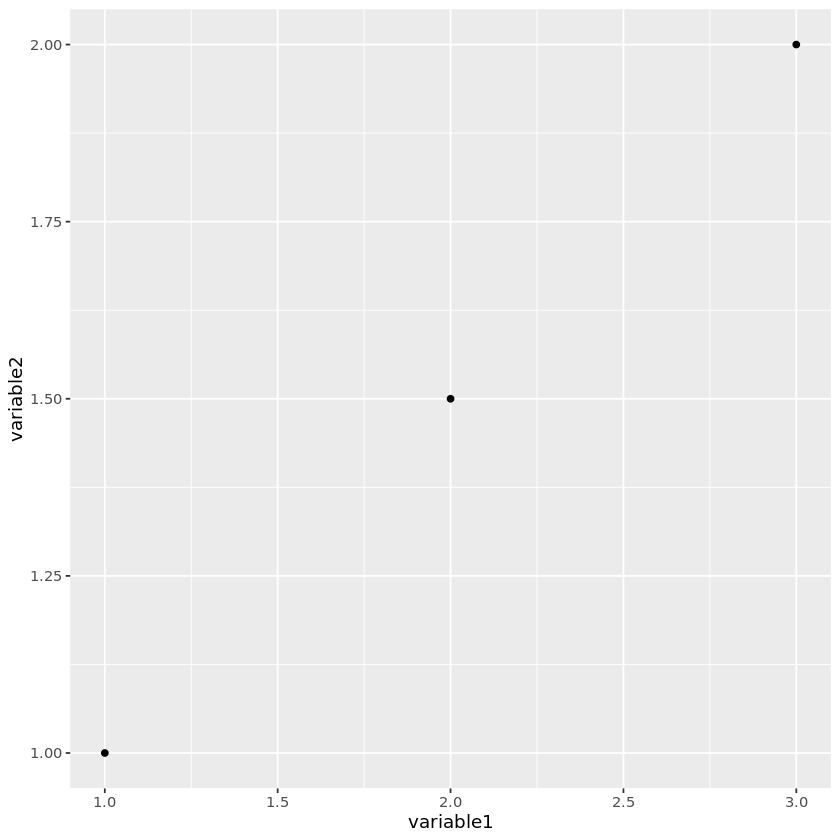

In [13]:
coordinate_system + geom_point(df, mapping = aes(x = variable1, y = variable2))

Otra forma de usar la función `ggplot` es pasarle como argumento el *data frame* directamente:

In [14]:
coordinate_system2 <- ggplot(data = df)

Esto nos permite a no pasar el *data frame* en la función `geom_point`, obsérvese que también podemos omitir el nombre `mapping` de argumento:

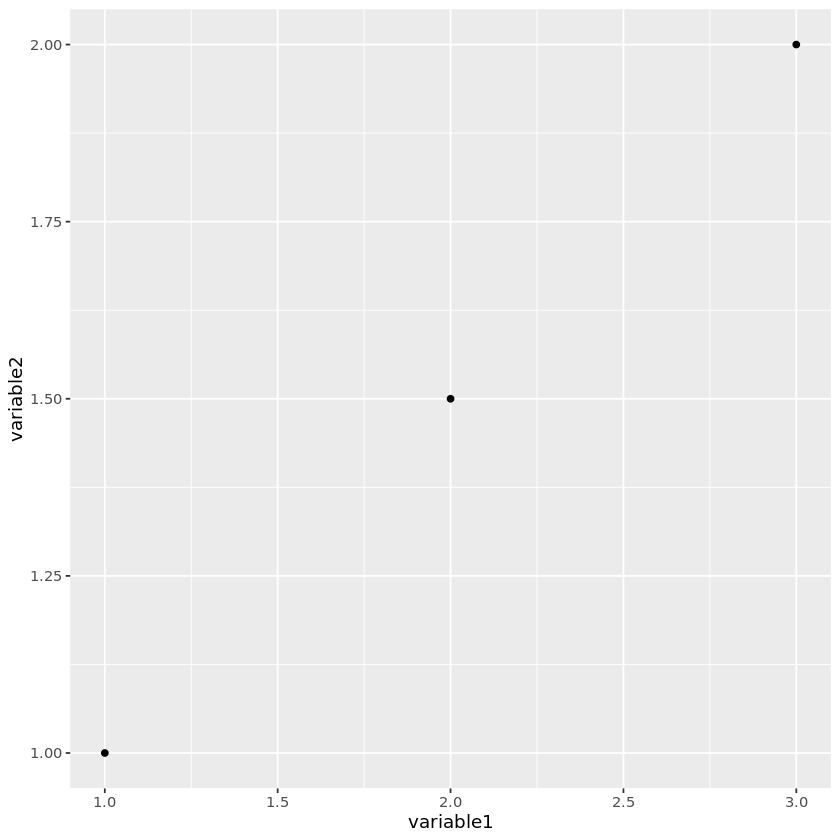

In [15]:
coordinate_system2 + geom_point(aes(x = variable1, y = variable2))

Otros *aesthetics* son **tamaño, forma o color**, por ejemplo, y podemos hacer el mapeo de alguna propiedad a alguna variable de mi *data frame*. 

In [16]:
clase <- c("clase1", "clase2", "clase1")

In [17]:
df2 <- data.frame(variable1 = x, variable2 = y, variable3=clase) 

In [18]:
print(df2)

  variable1 variable2 variable3
1         1       1.0    clase1
2         2       1.5    clase2
3         3       2.0    clase1


In [19]:
coordinate_system3 <- ggplot(data = df2)

Para el color usamos:

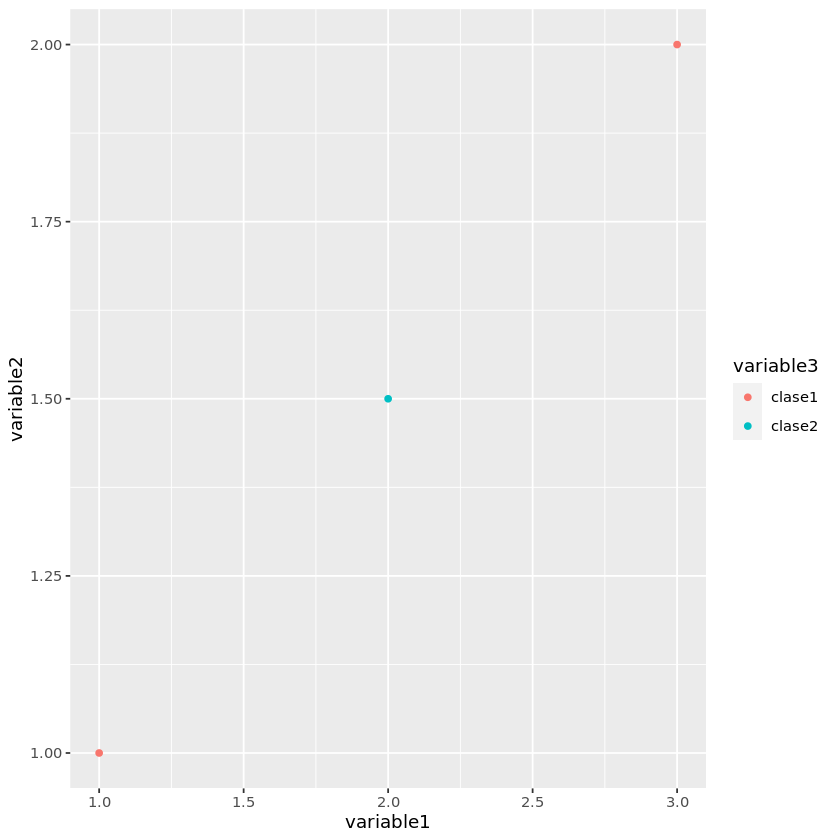

In [20]:
coordinate_system3 + geom_point(aes(x = variable1, y = variable2, color= variable3))

Obsérvese que se ha elegido automáticamente un **color** para cada nivel de la `variable3` que es la clase y su leyenda.

Para el **tamaño** y **color**:

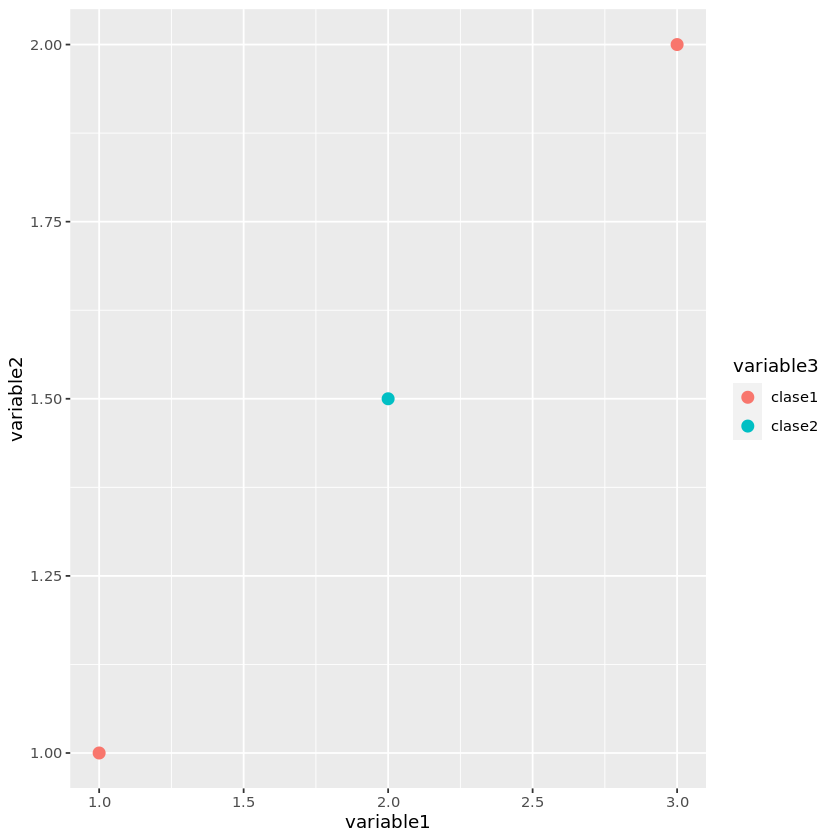

In [21]:
coordinate_system3 + geom_point(aes(x = variable1, y = variable2, color = variable3),
                                size = 3)

O bien si queremos que varíe el **tamaño** de acuerdo a los valores de la `variable3` (aunque no tendría mucho sentido tener tamaños con valores `clase1` o `clase2`)

Warning message:
“Using size for a discrete variable is not advised.”


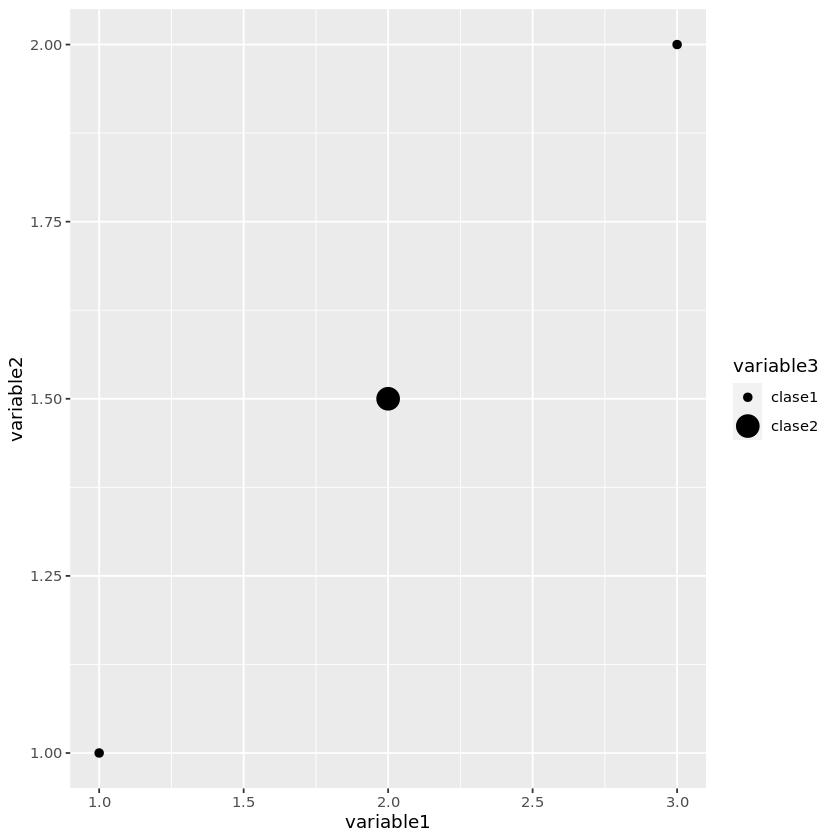

In [22]:
coordinate_system3 + geom_point(aes(x = variable1, y = variable2, size = variable3))

Cambiando la **forma**:

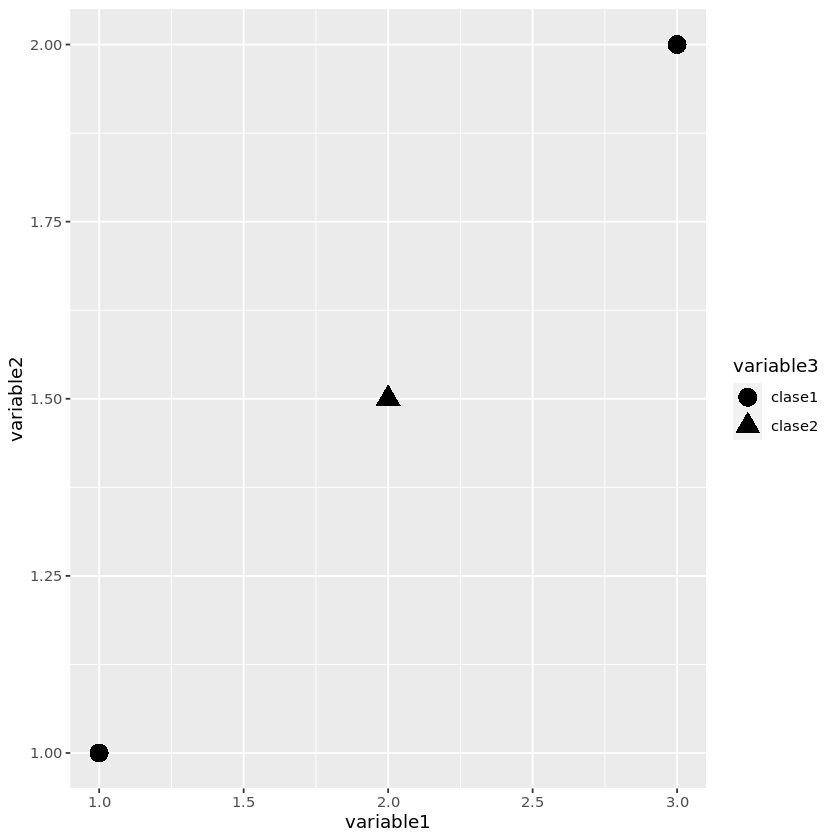

In [23]:
coordinate_system3 + geom_point(aes(x = variable1, y = variable2, shape = variable3),
                                size = 5)


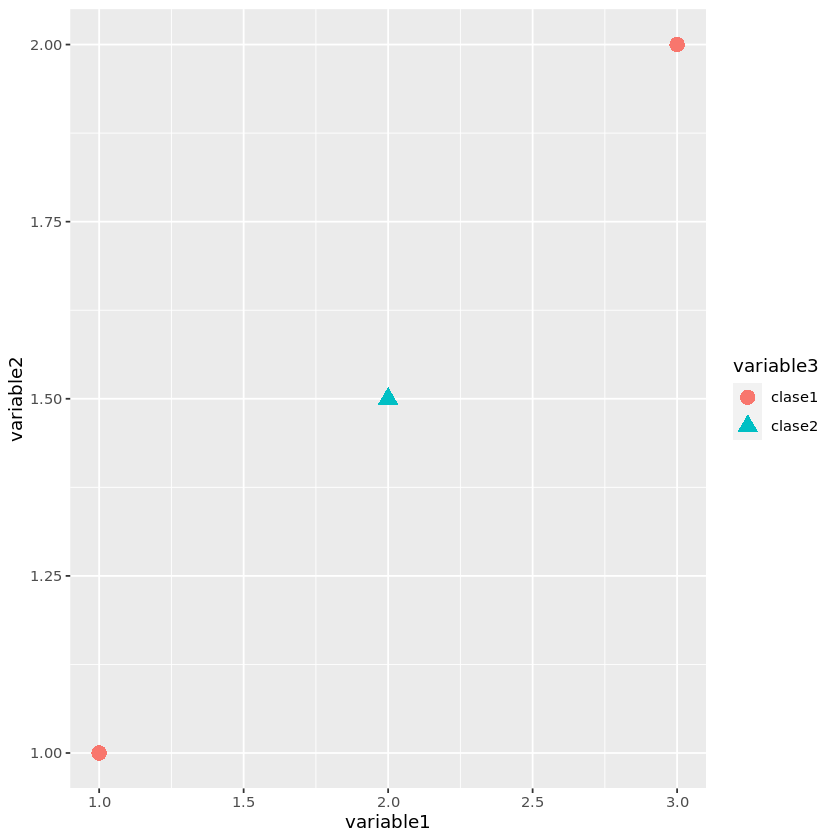

In [24]:
coordinate_system3 + geom_point(aes(x = variable1, y = variable2, color = variable3,
                                    shape = variable3),
                                size = 4)

En resúmen la función `aes` dentro de `geom_point` nos ayuda a asociar el nombre de una *aesthetic* con una variable.

Podemos también establecer **de forma manual** los *aesthetics* por ejemplo el color:

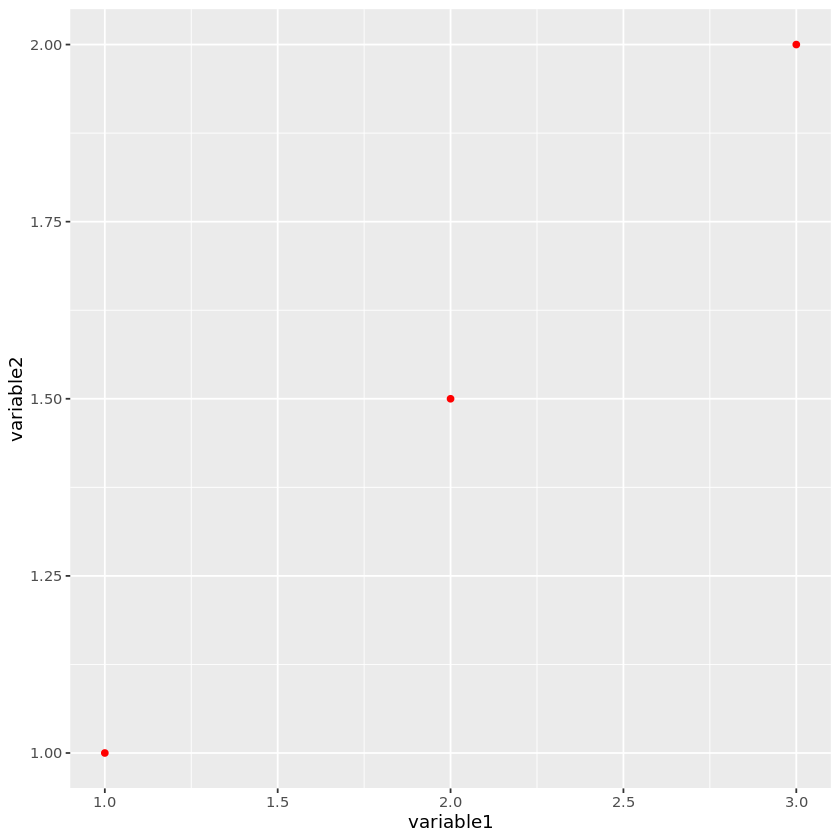

In [25]:
coordinate_system2 + geom_point(aes(x = variable1, y = variable2), 
                                color = "red")

El color y tamaño:

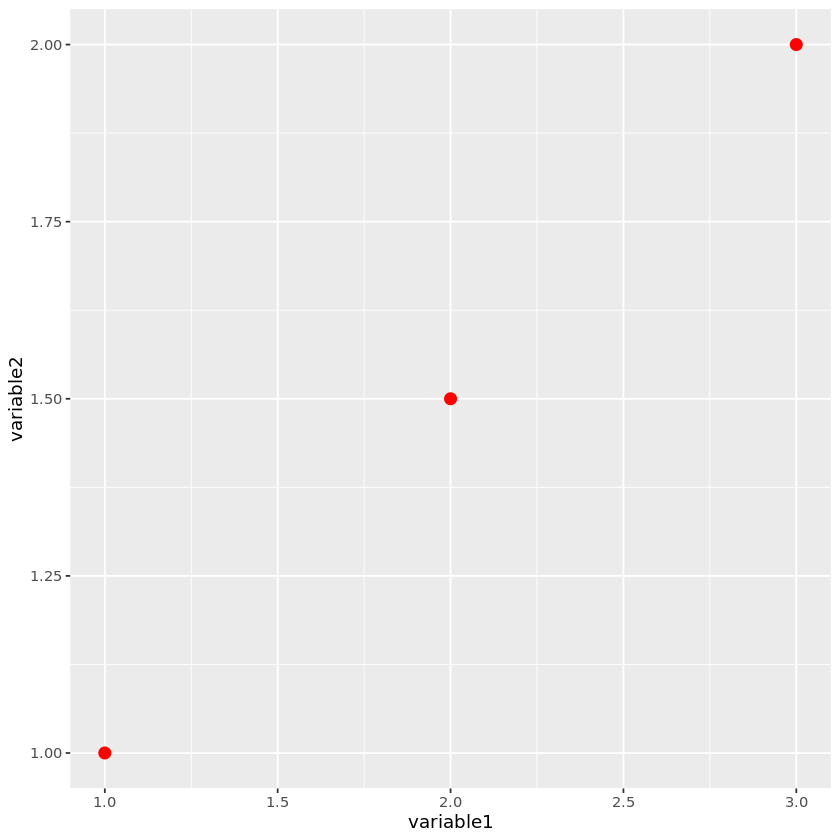

In [26]:
coordinate_system2 + geom_point(aes(x = variable1, y = variable2), 
                                color = "red",
                                size=3)

El color, el tamaño y la forma:

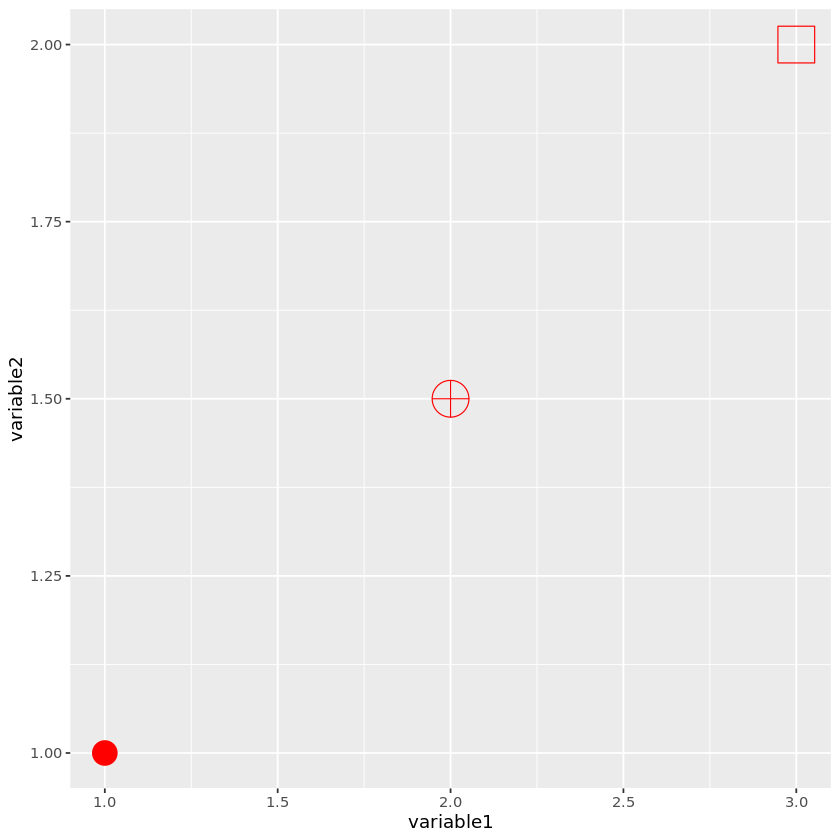

In [27]:
coordinate_system2 + geom_point(aes(x = variable1, y = variable2), 
                                color = "red",
                                size=10, 
                                shape = c(20,10,0))

Añadiendo título:

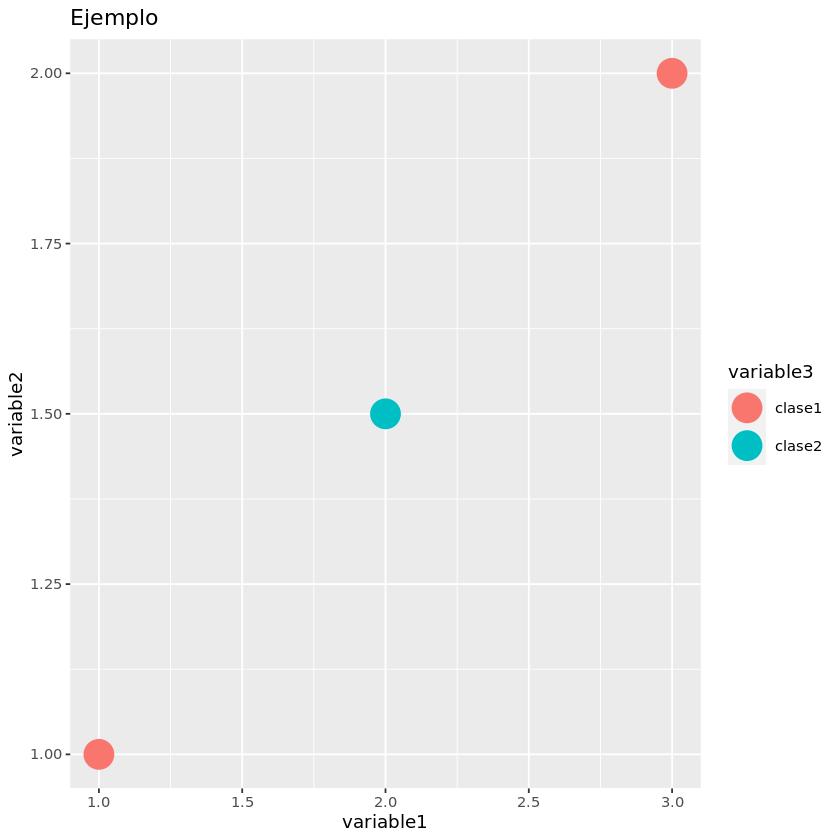

In [28]:
coordinate_system3 + geom_point(aes(x = variable1, y = variable2, color=variable3), 
                                size = 8) +
                     ggtitle('Ejemplo')

Centrando el título y ajustando su tamaño:

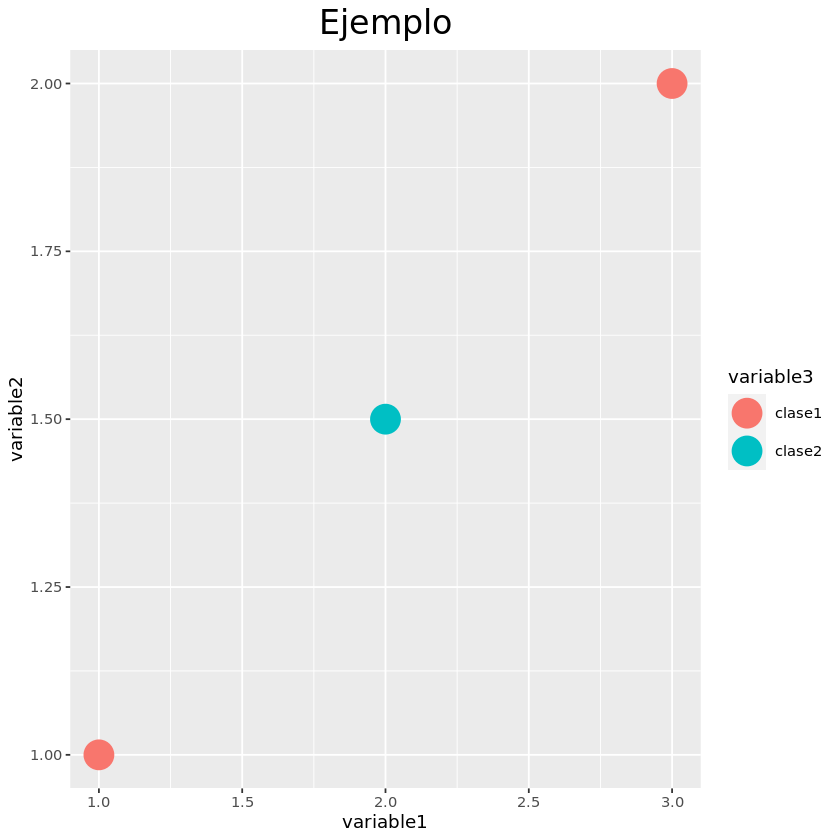

In [29]:
coordinate_system3 + geom_point(aes(x = variable1, y = variable2, color=variable3),
                                size= 8) +
                     ggtitle('Ejemplo') +
                     theme(plot.title = element_text(size=20, hjust = 0.5))

Centrando el título, ajustando su tamaño e incrementando tamaño de los rótulos de los ejes:

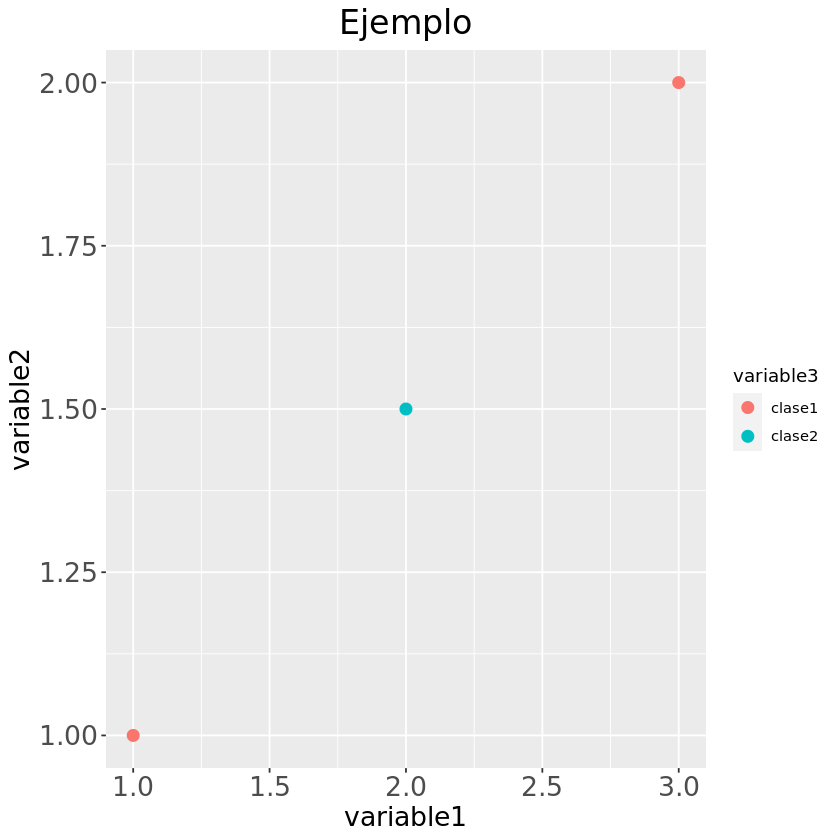

In [30]:
coordinate_system3 + geom_point(aes(x = variable1, y = variable2, color=variable3), 
                                size = 3) +
                     ggtitle('Ejemplo') +
                     theme(plot.title = element_text(size=20, hjust = 0.5),
                           axis.text=element_text(size=16),
                           axis.title=element_text(size=16))

## *Facets*

Si tenemos una variable que nos categorize nuestros datos podemos usar la función [facet_wrap](https://ggplot2.tidyverse.org/reference/facet_wrap.html) para graficar varios *subplots*. El primer argumento de esta función debe ser la variable de los datos.

Por ejemplo, si tenemos los datos:

In [31]:
npoints <- 21
x <- rnorm(npoints)
y <- rnorm(npoints)
nclass1 <- npoints/3
clase1_aux <- c(rep("a", nclass1), rep("b", nclass1), rep("c", nclass1))
clase1 <- sample(clase1_aux, npoints, replace=TRUE)

Ver función [sample](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/sample)

Construímos un *data.frame* como sigue:

In [32]:
df <- data.frame(variable1 = x, variable2 = y, clase1 = clase1)

In [33]:
print(df)

    variable1   variable2 clase1
1   0.5731909  0.50657526      a
2  -0.5487439 -0.68762992      a
3  -0.4322304  0.66345664      a
4  -2.3233627 -0.01915809      b
5  -2.3730973 -1.26385698      a
6   0.4888297 -0.12347255      b
7  -0.8061540  0.13107008      a
8  -0.2593812  0.44799902      c
9   0.2859154 -2.97103082      b
10 -0.6207801  0.04661807      c
11  1.1983109 -1.17525091      a
12 -1.1624845  0.43616763      b
13 -0.4988946 -0.13591284      c
14  1.1001188  0.52601350      a
15  1.4139456 -0.65763949      a
16 -1.6210547 -2.33929786      c
17  0.8819552  0.26467279      b
18 -1.6531688  1.88684760      c
19  0.4920539  0.59435288      a
20 -1.4277350 -0.15377880      a
21  0.8674282  0.66122633      b


In [34]:
csystem <- ggplot(df)

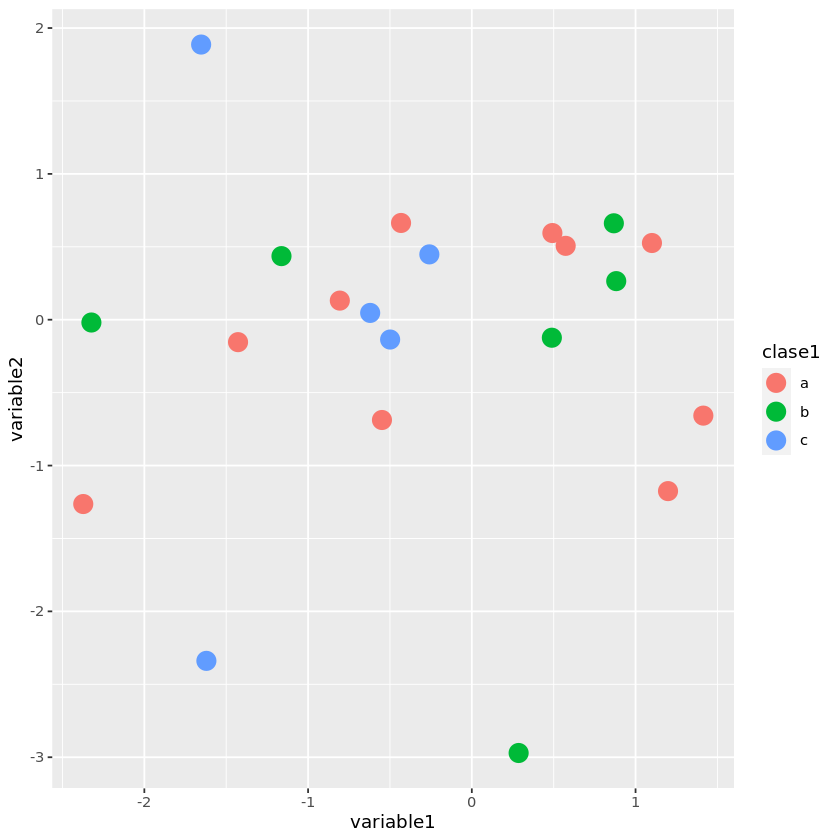

In [35]:
csystem + geom_point(aes(x = variable1, y = variable2, color = clase1),
                     size = 5)

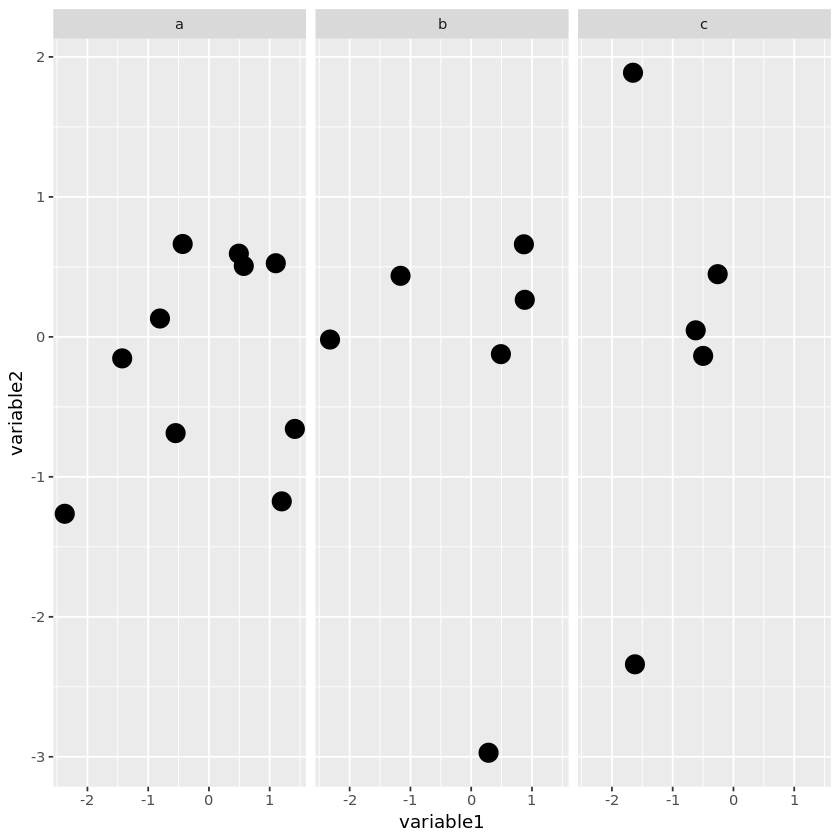

In [36]:
csystem + geom_point(aes(x = variable1, y = variable2),
                     size = 5) +
          facet_wrap(~clase1, ncol = 3)

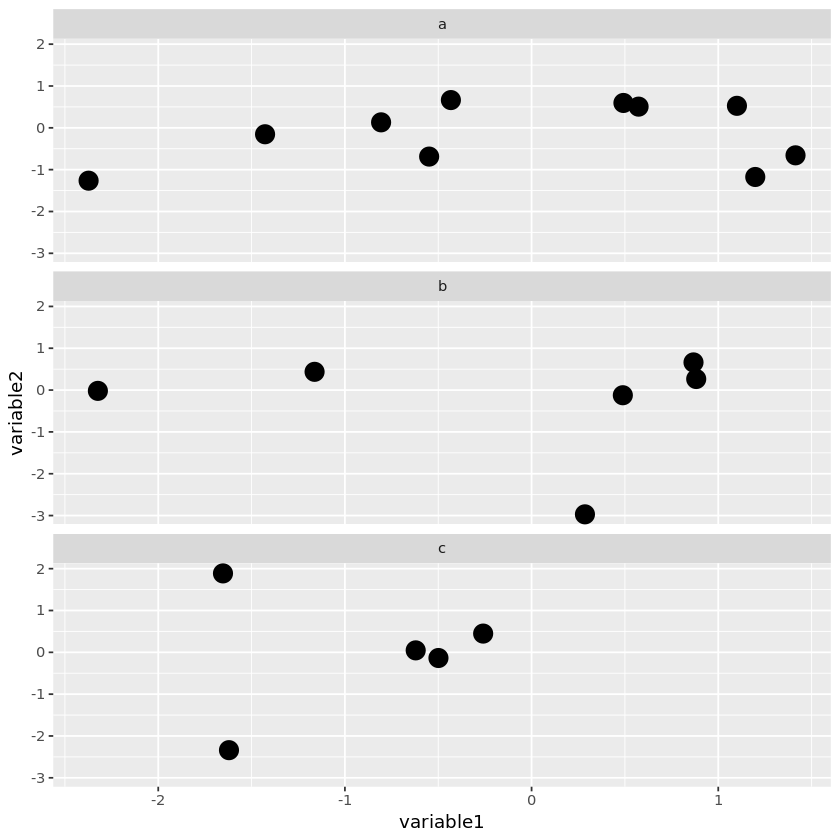

In [37]:
csystem + geom_point(aes(x = variable1, y = variable2),
                     size = 5) +
          facet_wrap(~clase1, nrow=3)

Y si tenemos otra variable que también nos categorize los datos y queremos hacer la subdivisión por ambas variables podemos usar la función [facet_grid](https://ggplot2.tidyverse.org/reference/facet_grid.html)

In [38]:
nclass2 <- npoints/2
clase2_aux <- c(rep("X", nclass2), rep("O", nclass2))
clase2 <- sample(clase2_aux, npoints, replace=TRUE)

In [39]:
df$clase2 <- clase2

In [40]:
print(df)

    variable1   variable2 clase1 clase2
1   0.5731909  0.50657526      a      X
2  -0.5487439 -0.68762992      a      X
3  -0.4322304  0.66345664      a      O
4  -2.3233627 -0.01915809      b      O
5  -2.3730973 -1.26385698      a      X
6   0.4888297 -0.12347255      b      O
7  -0.8061540  0.13107008      a      X
8  -0.2593812  0.44799902      c      O
9   0.2859154 -2.97103082      b      X
10 -0.6207801  0.04661807      c      X
11  1.1983109 -1.17525091      a      O
12 -1.1624845  0.43616763      b      O
13 -0.4988946 -0.13591284      c      X
14  1.1001188  0.52601350      a      O
15  1.4139456 -0.65763949      a      O
16 -1.6210547 -2.33929786      c      O
17  0.8819552  0.26467279      b      X
18 -1.6531688  1.88684760      c      O
19  0.4920539  0.59435288      a      X
20 -1.4277350 -0.15377880      a      O
21  0.8674282  0.66122633      b      X


In [41]:
csystem2 <- ggplot(df)

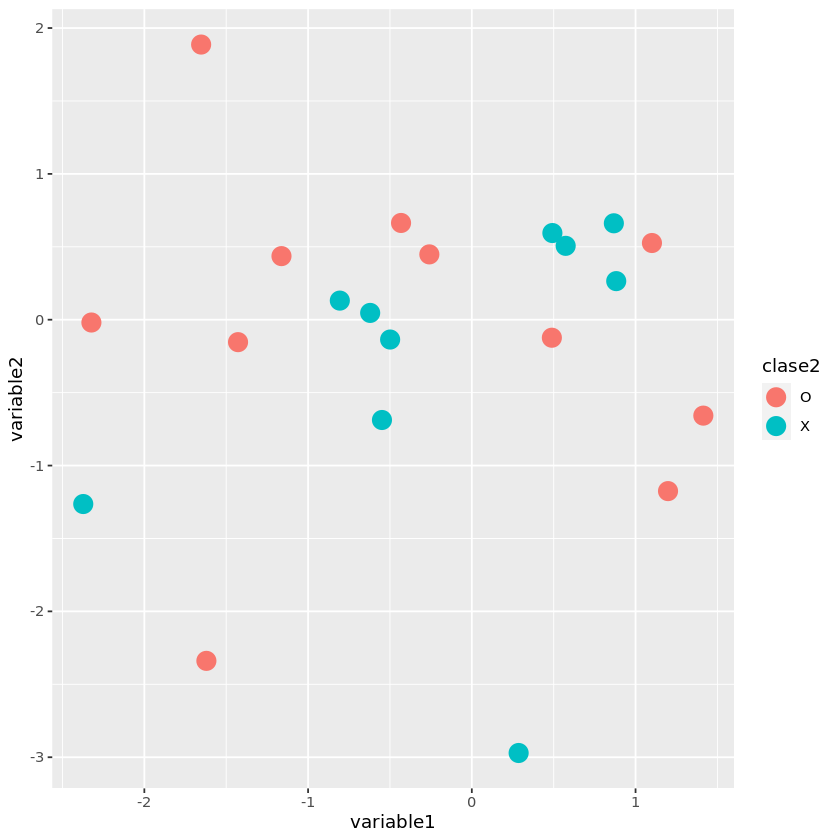

In [42]:
csystem2 + geom_point(aes(x = variable1, y = variable2, color = clase2),
                     size = 5)

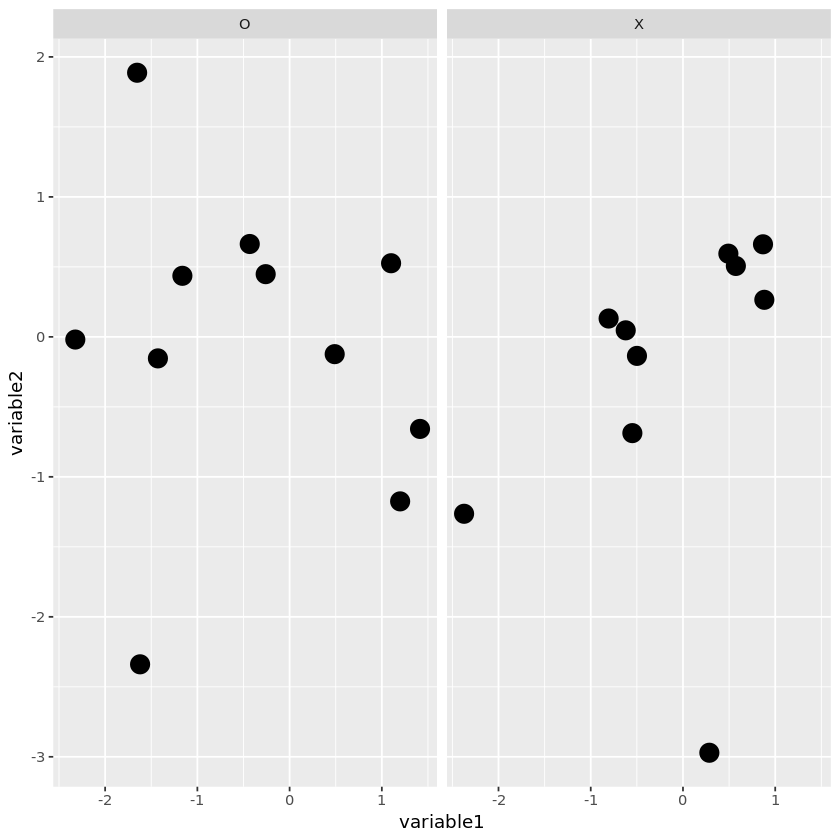

In [43]:
csystem2 + geom_point(aes(x = variable1, y = variable2),
                     size = 5) +
           facet_wrap(~clase2)

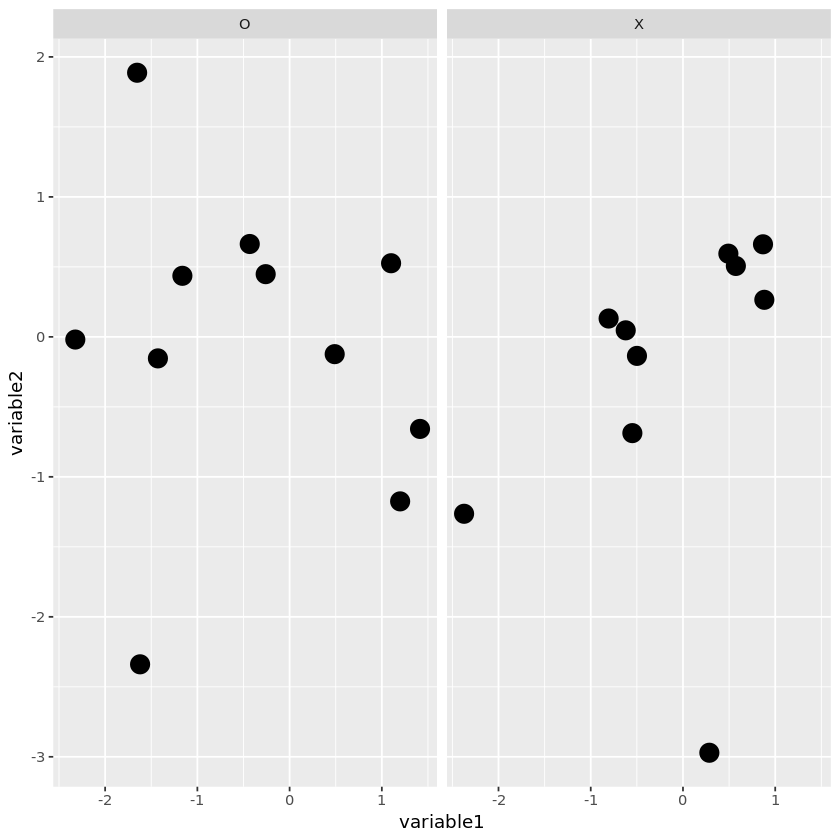

In [44]:
csystem2 + geom_point(aes(x = variable1, y = variable2),
                     size = 5) +
           facet_grid(~clase2)

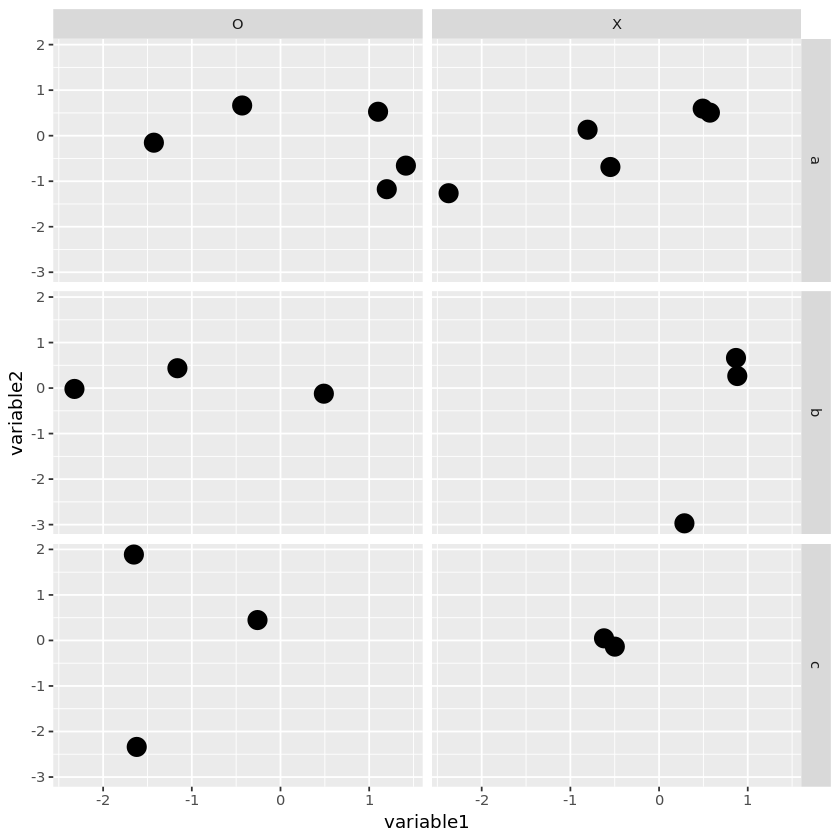

In [45]:
csystem2 + geom_point(aes(x = variable1, y = variable2),
                     size = 5) +
           facet_grid(clase1~clase2)

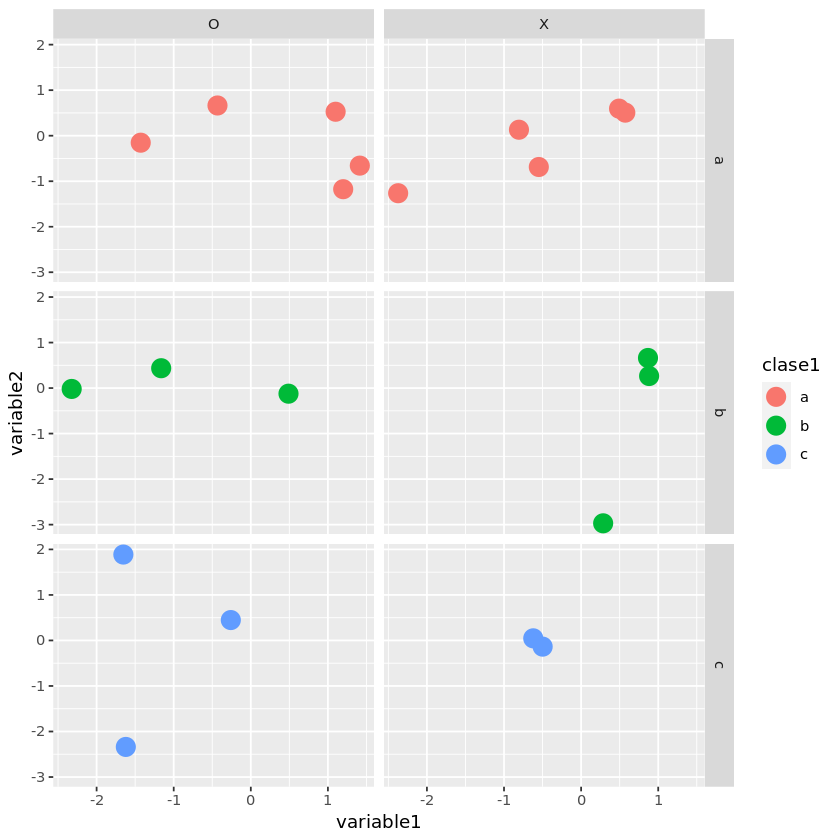

In [46]:
csystem2 + geom_point(aes(x = variable1, y = variable2,color=clase1),
                     size = 5) +
           facet_grid(clase1~clase2)

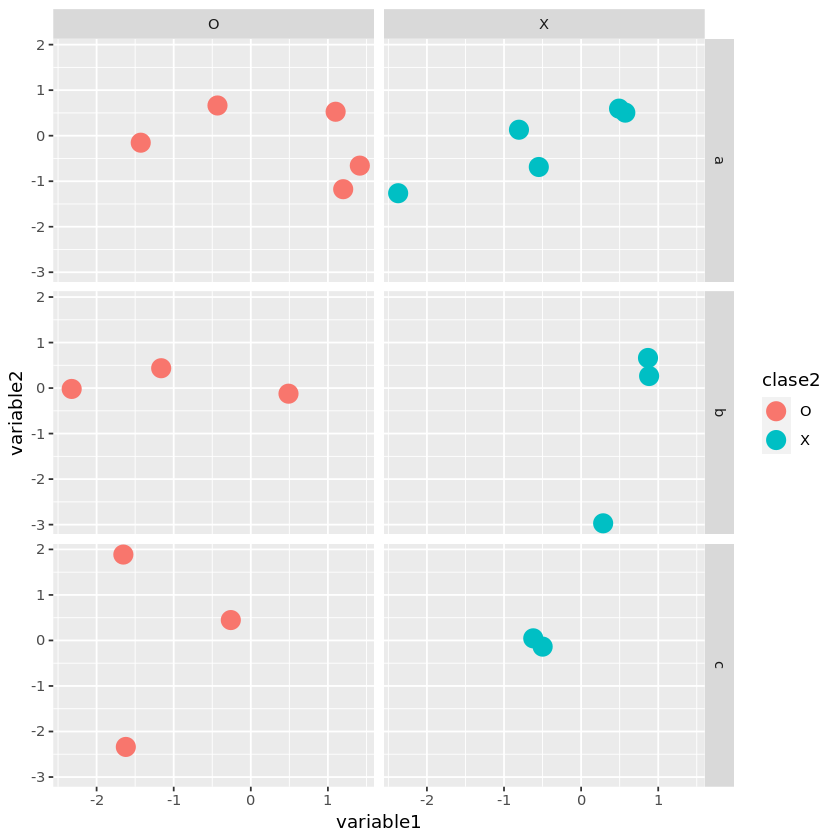

In [47]:
csystem2 + geom_point(aes(x = variable1, y = variable2,color=clase2),
                     size = 5) +
           facet_grid(clase1~clase2)

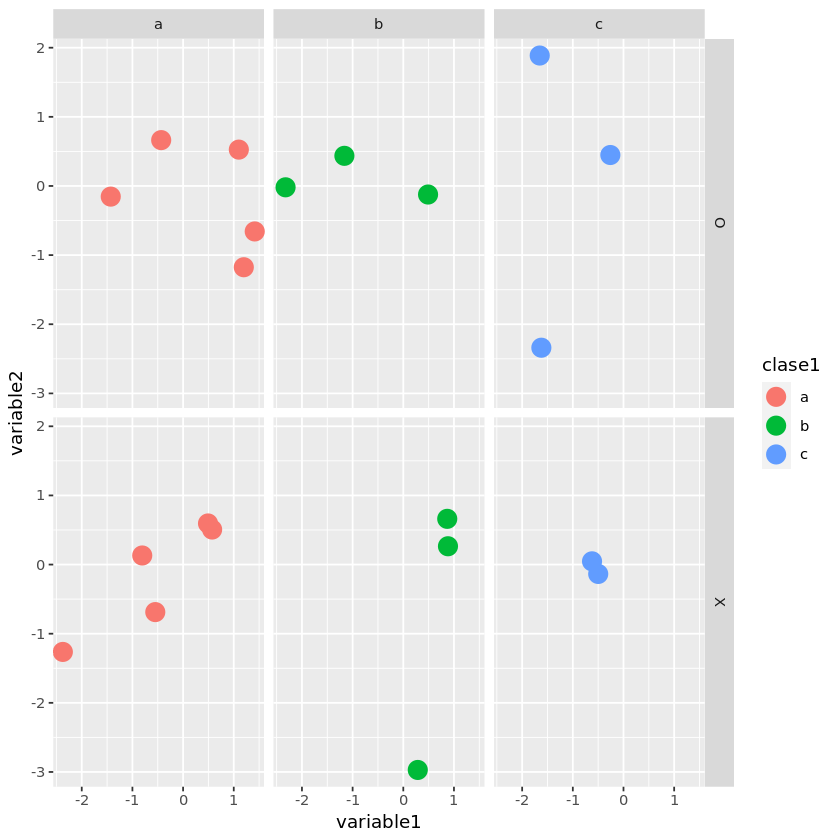

In [49]:
csystem2 + geom_point(aes(x = variable1, y = variable2,color=clase1),
                     size = 5) +
           facet_grid(clase2~clase1)